In [1]:
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM # Helpful cosmlogy tools, see https://docs.astropy.org/en/stable/api/astropy.cosmology.FlatLambdaCDM.html
import astropy.units as U # Handling units: can assign units to variables then units worked out for you when doing operations etc, can be a bit fiddlt 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys, os

# global font parameters, for plotting purposes
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['font.size'] = 15

In [2]:
A_N = 86.2884 # Add areas for normalization of histograms
A_S = 87.204
A = A_N + A_S
print(A)

173.49239999999998


In [3]:
! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT*clustering* # Location of data and randoms to use

/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_0_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_10_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_11_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_12_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_13_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_14_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_15_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_16_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_17_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clusteri

In [4]:
# N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits') # original catalogue to use
# S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')
N = Table.read('/pscratch/sd/e/edown/SV3/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_N_clustering.dat.fits') # My catalogues made with Sam's new k corrections
S = Table.read('/pscratch/sd/e/edown/SV3/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_S_clustering.dat.fits') # Process documented in ???
N0 = Table.read('/pscratch/sd/e/edown/SV3/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_N_2_clustering.ran.fits')
S0 = Table.read('/pscratch/sd/e/edown/SV3/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_S_2_clustering.ran.fits')
N['AREA'] = A_N
S['AREA'] = A_S
N['APPLIM'] = 19.539993
S['APPLIM'] = 19.5
N['AREA'] = 86.2884
S['AREA'] = 87.204

In [5]:
data = Table(np.hstack((N,S))) #BGS BRIGHT in N, S combined
data_rand = Table(np.hstack((N0,S0)))

In [6]:
N # Display Table

RA,DEC,TARGETID,Z,PHOTSYS,NTILE,TILES,WEIGHT,WEIGHT_ZFAIL,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_RP1,ABSMAG_RP0,NZ,WEIGHT_FKP,AREA,APPLIM
float64,float64,int64,float64,bytes1,int64,bytes43,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.20458196461243,60.31535787110577,39633390185481345,0.08969256109731599,N,1,100,1.0517310031649074,1.0517310031649074,1.0,1.0,11.618794,18.39226,20.892622,13.421043,9.27371,0.49187707313077883,-0.1438559849012358,-0.13704912858857507,0.0,0.0,0.0,0.0,-0.08700178426439652,-17.717863049027546,0.0,0.004439916166508362,0.032790950350051785,86.2884,19.539993
187.04622815471808,60.82670180284912,39633396124617897,0.37400455377945924,N,1,100,1.0534446334208933,1.0534446334208933,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.8856023556148469,0.18975690225296254,0.8512813166576467,0.0,0.0,0.0,0.0,-0.36278441716607546,-21.121215751172787,0.0,0.00014155439793057053,0.5153563215257442,86.2884,19.539993
187.83760708675698,60.38987543677365,39633393155049303,0.1731108191825362,N,1,100,2.1066616169375343,1.0533308084687671,2.0,1.0,13.26433,27.728409,46.020153,37.03337,25.867756,0.6639683259032432,-0.11060801112955,0.026023714846547863,0.0,0.0,0.0,0.0,-0.16791749460706012,-19.65805068643624,0.0,0.0017566779643715786,0.07892444307399922,86.2884,19.539993
187.05117249536465,62.614542270156655,39633416324383107,0.2703579310142208,N,1,100,1.006244358336115,1.006244358336115,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,1.000581905357316,0.05446087220904006,0.5570985713439119,0.0,0.0,0.0,0.0,-0.2622471930837942,-20.3331059440209,0.0,0.0008912437347914296,0.14448978129250234,86.2884,19.539993
191.14757099005186,60.345815959235,39633390185480938,0.2819459922463374,N,1,100,2.1018609714727186,1.0509304857363593,2.0,1.0,6.782468,16.732075,29.996437,31.939342,25.343126,0.6759567745947177,-0.015904365715295687,0.28854466718510385,0.0,0.0,0.0,0.0,-0.27348761247894726,-20.28856424404696,0.0,0.000562639527315662,0.21106622078372492,86.2884,19.539993
186.48359894373857,61.73967570511937,39633407801558322,0.08577825488213503,N,1,100,1.050619659576266,1.050619659576266,1.0,1.0,15.079609,20.454126,26.065075,13.486019,10.797623,0.3337083754670799,-0.1304051823345983,-0.1331370715956235,0.0,0.0,0.0,0.0,-0.08320490723567098,-17.7478770856227,0.0,0.004439916166508362,0.032790950350051785,86.2884,19.539993
189.28672536137475,60.18713259808659,39633390168704731,0.21452305283357412,N,1,100,1.0024997236597695,1.0024997236597695,1.0,1.0,6.3314033,19.638945,38.222126,43.818123,28.204218,0.9155005436950254,-0.04221950244096295,0.2713258217839338,0.0,0.0,0.0,0.0,-0.2080873612485669,-19.82948221723629,0.0,0.0012868095968615204,0.10472504734206103,86.2884,19.539993
189.20703625254848,60.13450219401336,39633390168704208,0.1842724056985206,N,1,100,2.009357363734916,1.004678681867458,2.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.7203345043167666,-0.0947494002253448,0.07334573718152154,0.0,0.0,0.0,0.0,-0.17874423352756497,-20.393170924631686,0.0,0.0017174301120465372,0.08058273506904148,86.2884,19.539993
188.7298325265811,60.181046704454054,39633390164510257,0.2854181586411897,N,1,100,3.041093240252666,1.0136977467508885,3.0,1.0,9.799708,23.07847,40.24855,43.608025,32.920425,0.631333321276919,-0.02945518267267125,0.26919654243713004,0.0,0.0,0.0,0.0,-0.276855613881954,-20.65122892638801,0.0,0.000562639527315662,0.21106622078372492,86.2884,19.539993


## Some distributions of properties: absolute magnitude, colour, redshift

Distributions should be the same between data and randoms, matching any differences between N and S

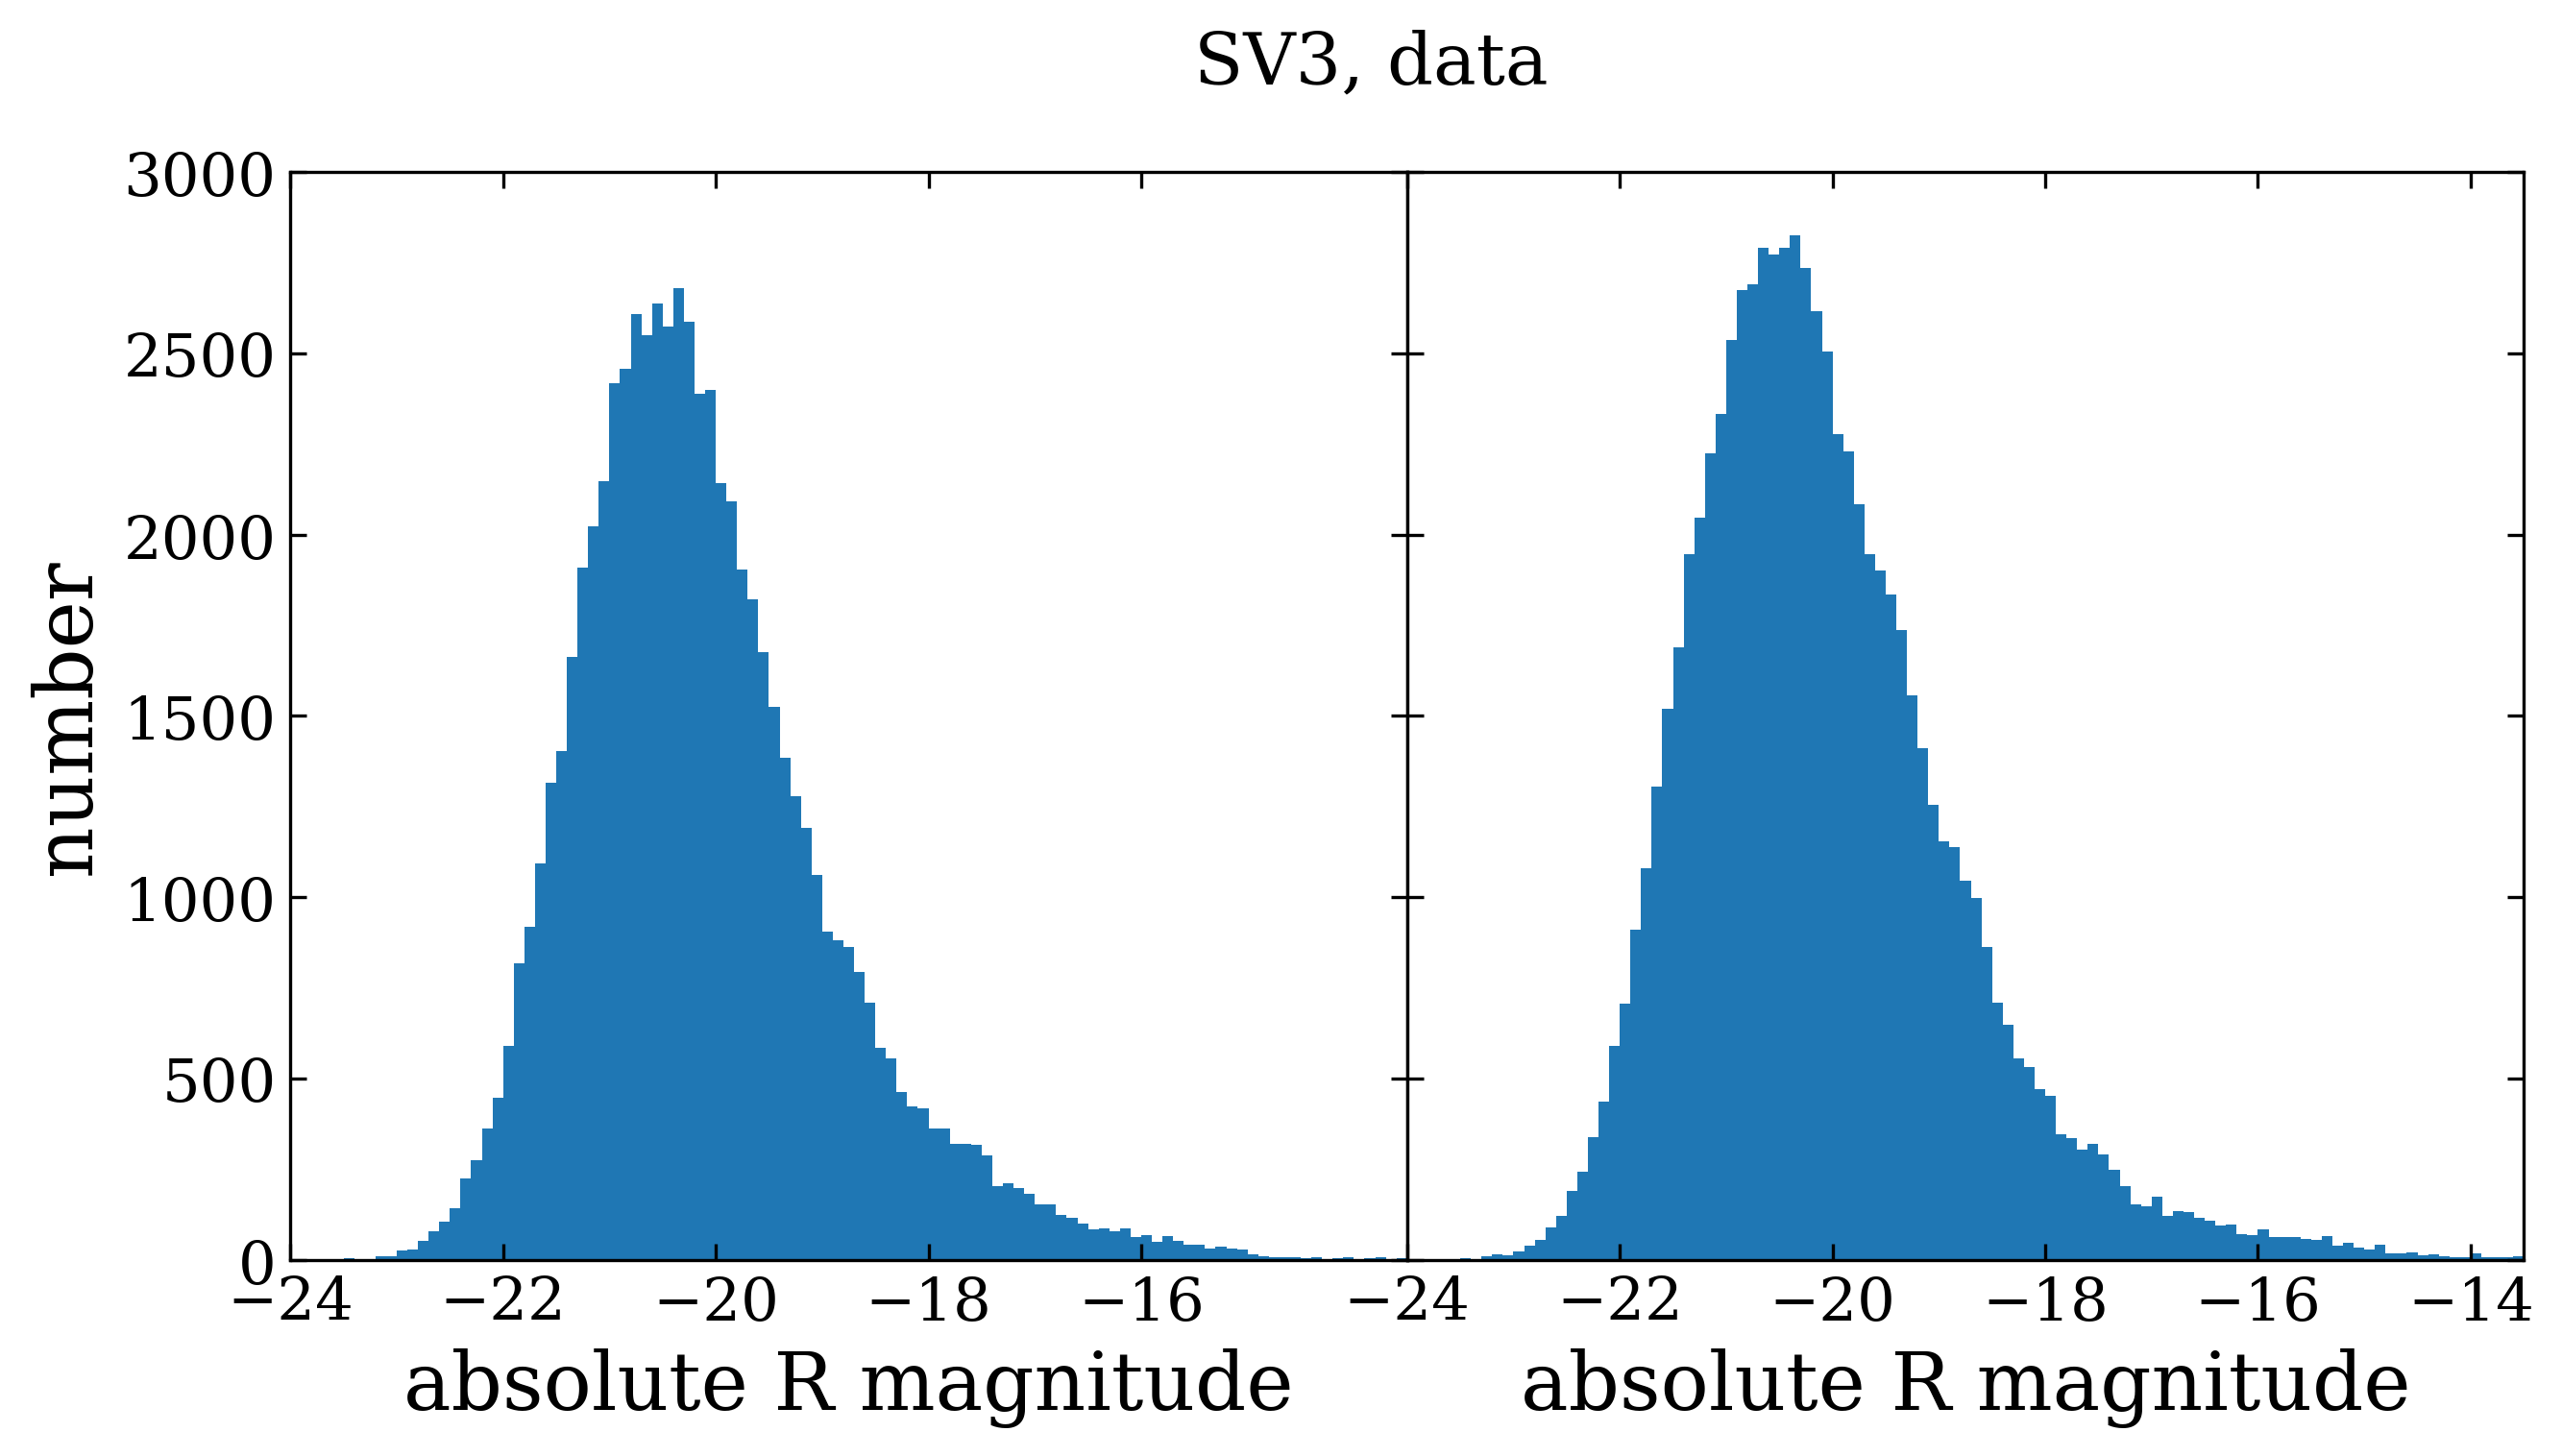

In [7]:
s=20
plt.figure(figsize=(10,5),dpi=300)
M_range = np.arange(-25,-10,0.1)
plt.suptitle('SV3, data')
ax1 = plt.subplot(121)
ax1.hist(N['ABSMAG_RP1'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
plt.ylabel('number', size=s)
plt.ylim(0,3000)
plt.xlim(-24,-13.5)
plt.xticks([-24,-22,-20,-18,-16])

ax2 = plt.subplot(122)
ax2.hist(S['ABSMAG_RP1'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
ax2.set_yticklabels([])
plt.ylim(0,3000)
plt.xlim(-24,-13.5)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.subplots_adjust(wspace=0)

plt.show()

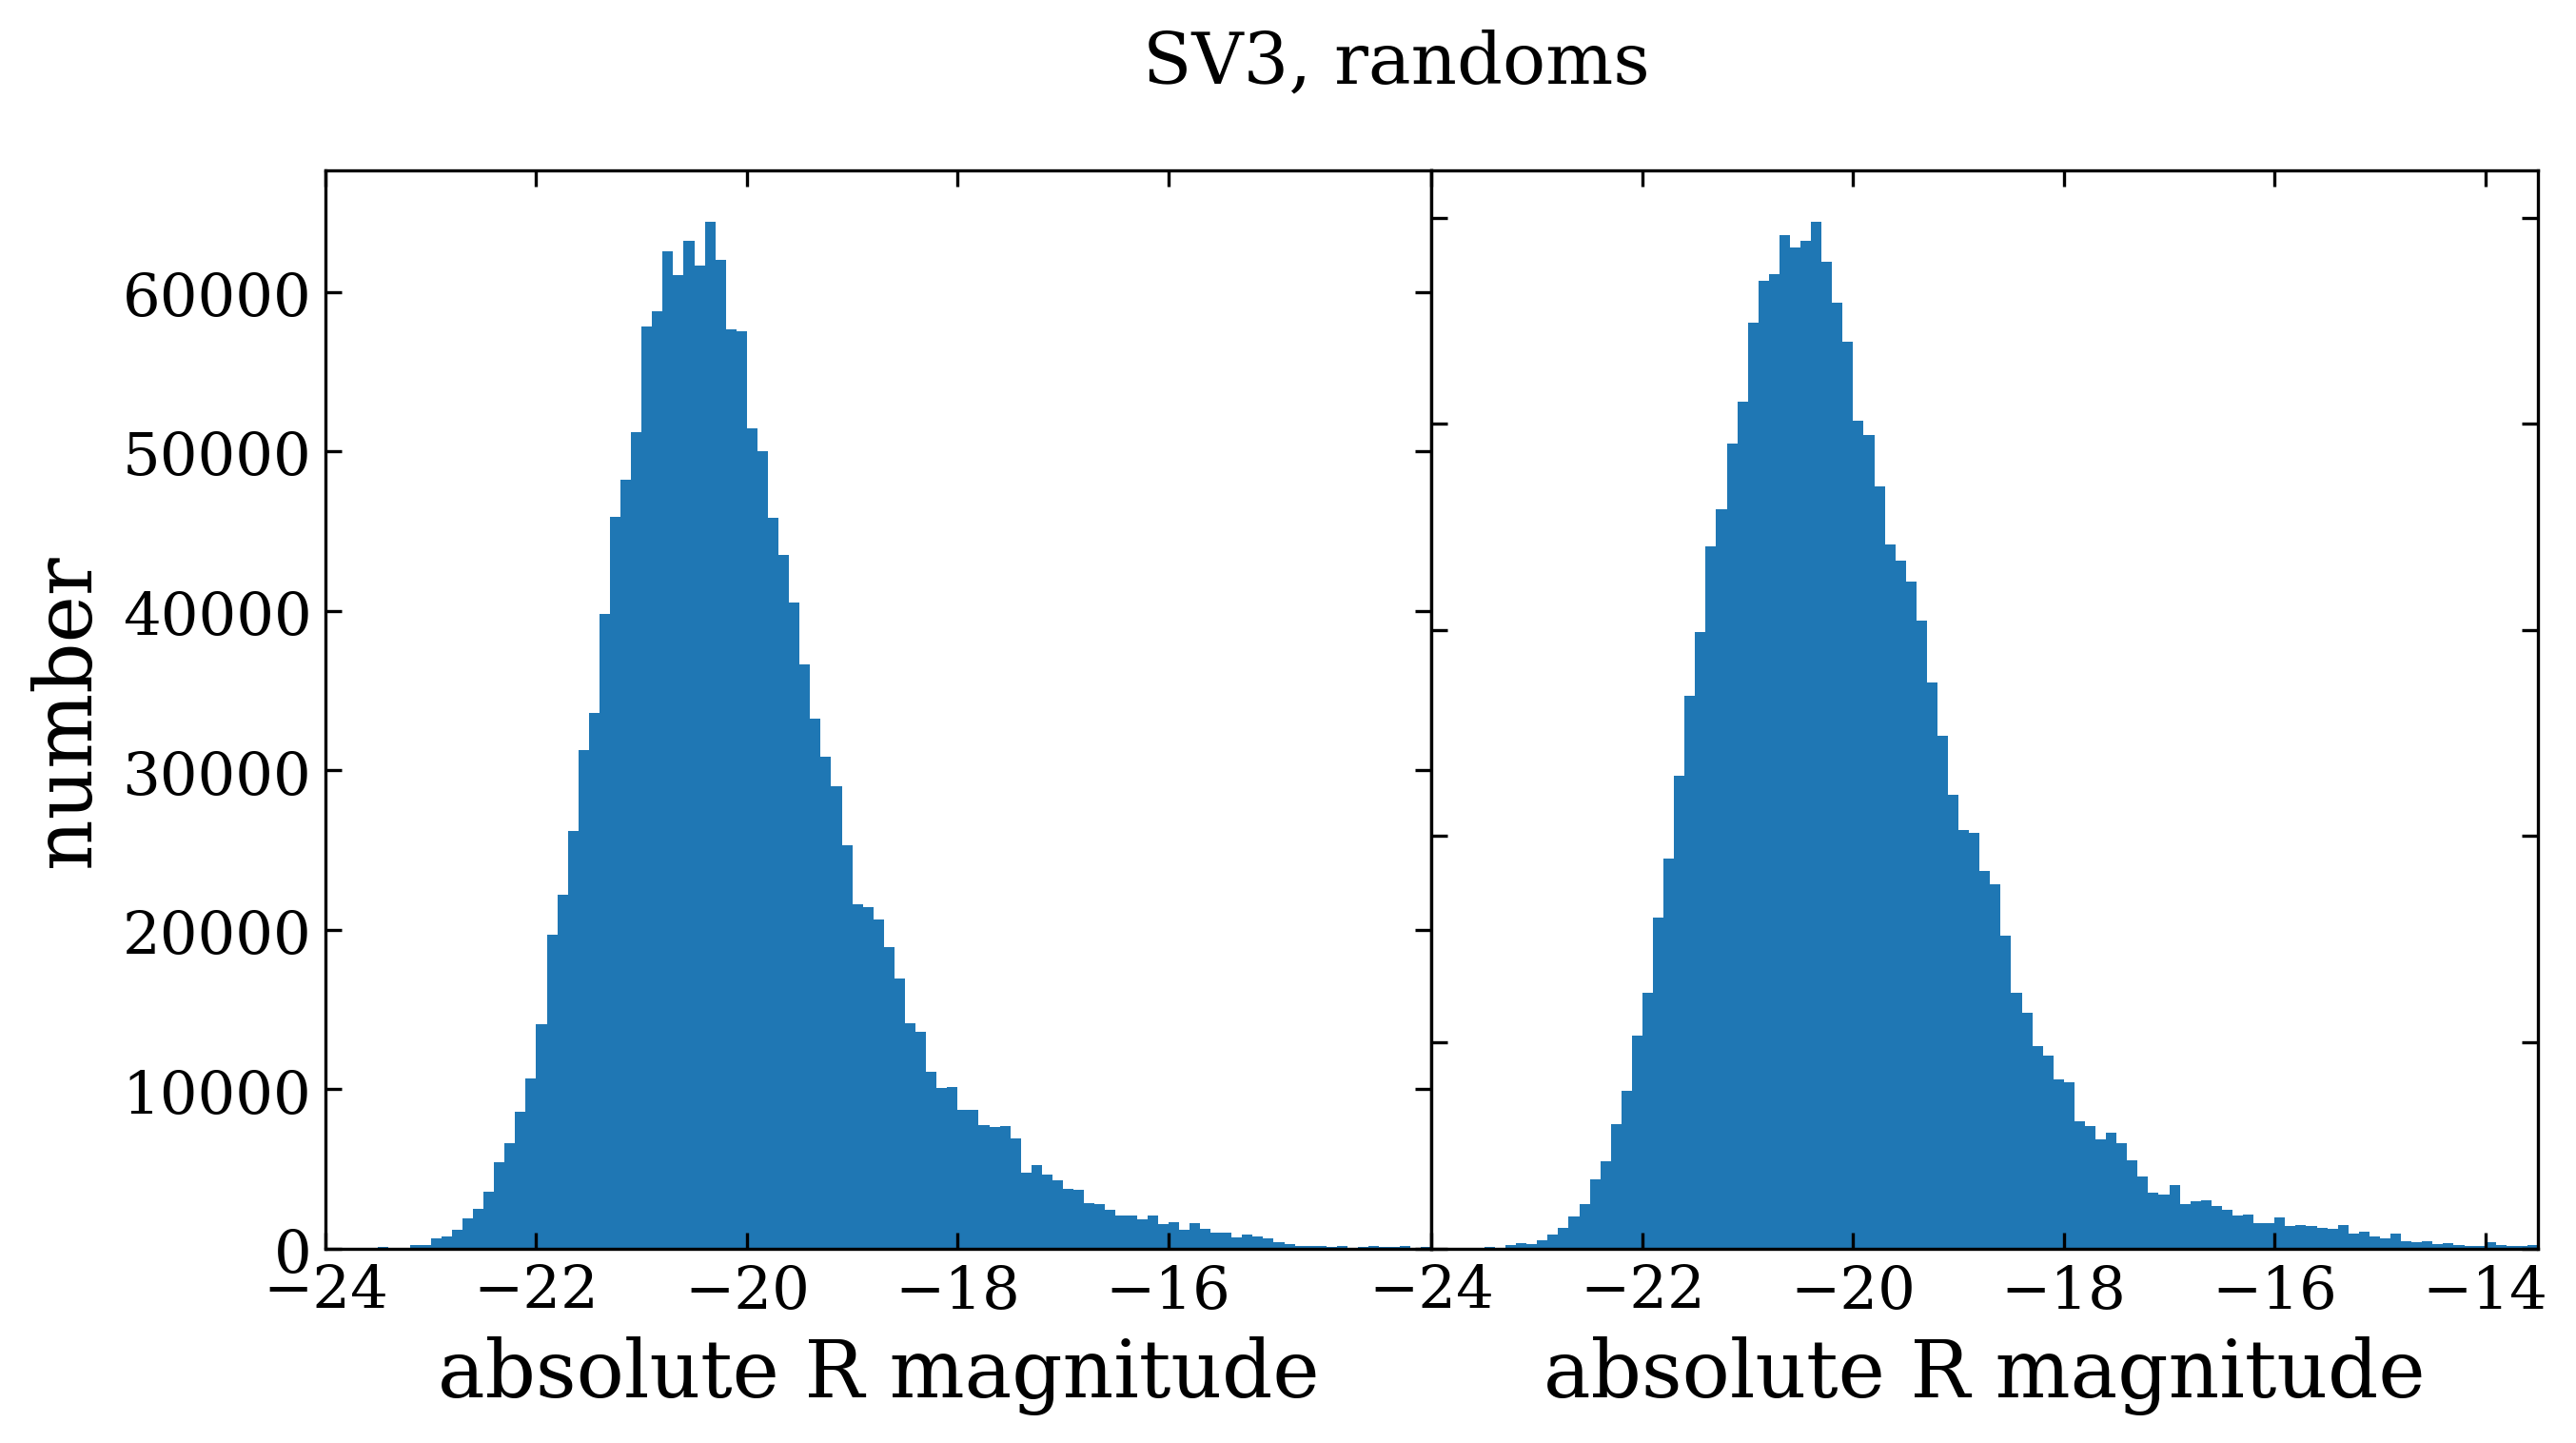

In [8]:
s=20
plt.figure(figsize=(10,5),dpi=300)
M_range = np.arange(-25,-10,0.1)
plt.suptitle('SV3, randoms')
ax1 = plt.subplot(121)
# plt.text(-14.4,2700,'N', size=s)
ax1.hist(N0['ABSMAG_RP1'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
plt.ylabel('number', size=s)
# plt.ylim(0,3000)
plt.xlim(-24,-13.5)
plt.xticks([-24,-22,-20,-18,-16])
#ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

ax2 = plt.subplot(122)
# plt.text(-14.4,2700, 'S', size=s)
ax2.hist(S0['ABSMAG_RP1'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
ax2.set_yticklabels([])
# plt.ylim(0,3000)
plt.xlim(-24,-13.5)
#ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.subplots_adjust(wspace=0)

plt.show()

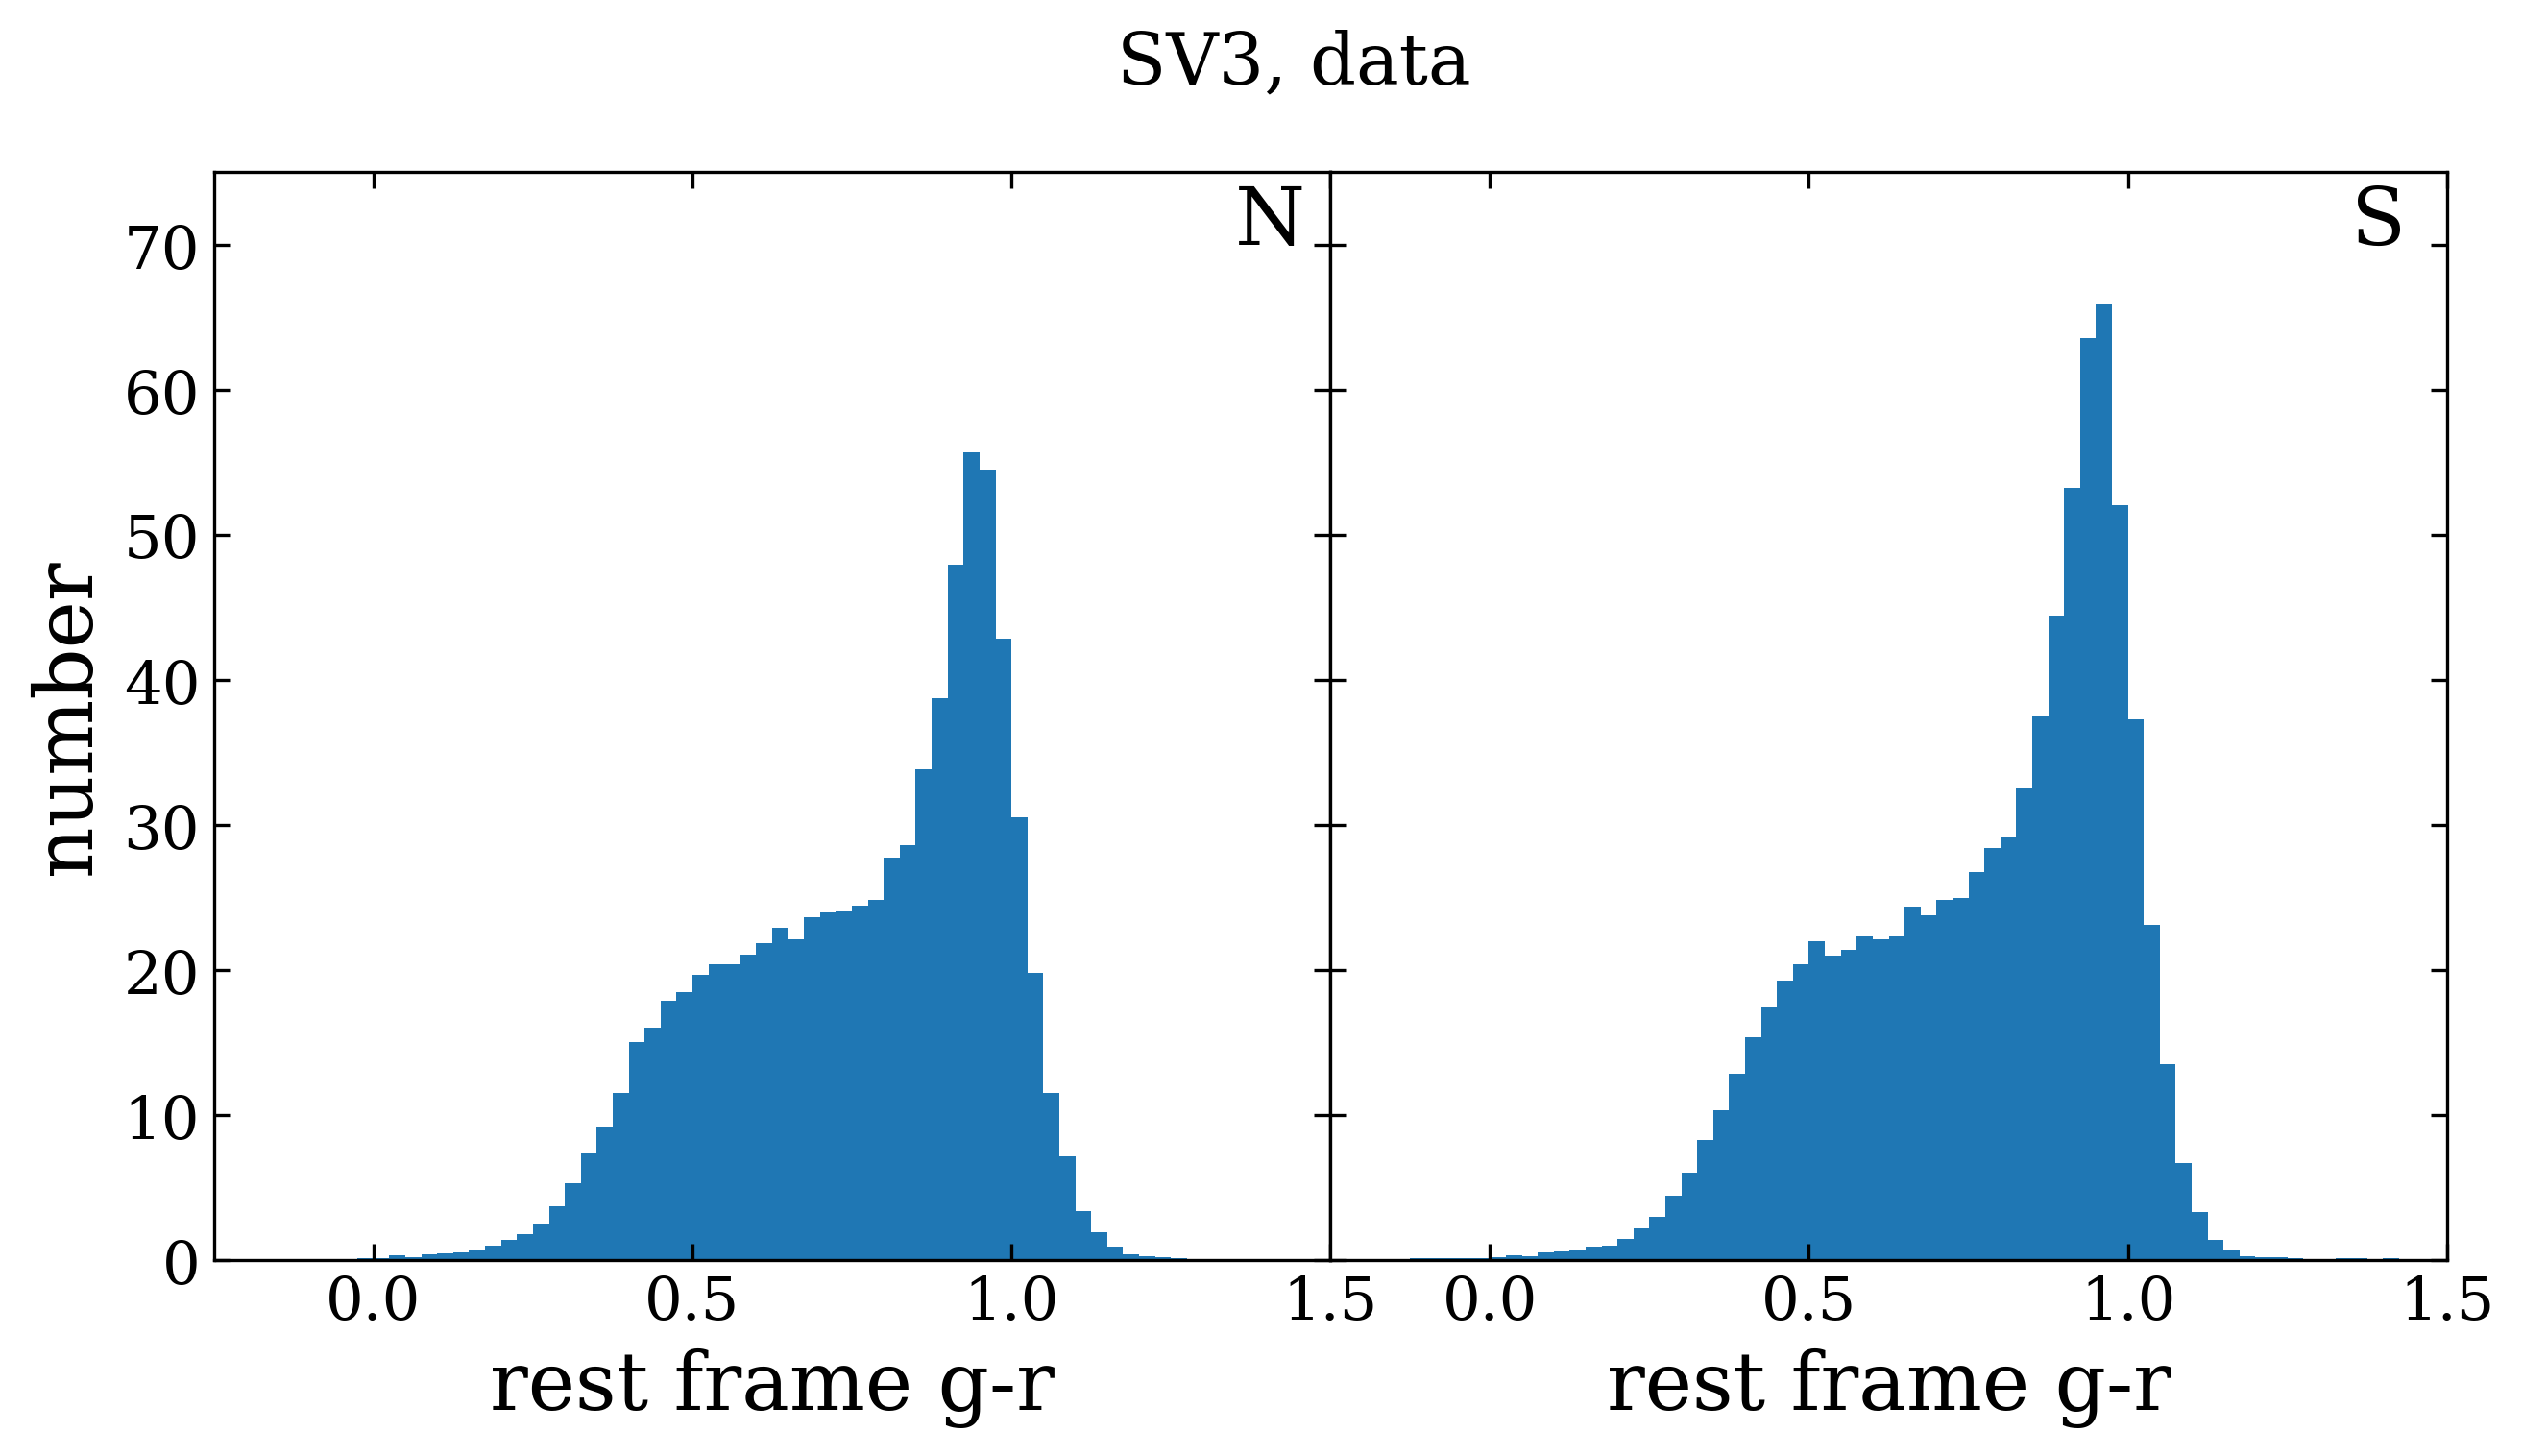

In [9]:
s=20
plt.figure(figsize=(10,5),dpi=300)
plt.suptitle('SV3, data')
ax1 = plt.subplot(121)
plt.text(1.35,70, 'N',size=s)
hist_N = ax1.hist(N['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), weights=1/N['AREA'])
plt.xlabel('rest frame g-r',size=s)
plt.ylabel('number',size=s)
plt.ylim(0,75)
plt.xlim(-0.25,1.5)

ax2 = plt.subplot(122)
plt.text(1.35,70, 'S',size=s)
hist_S = ax2.hist(S['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), weights=1/S['AREA'])
plt.xlabel('rest frame g-r',size=s)
plt.ylim(0,75)
plt.xlim(-0.25,1.5)
ax2.set_yticklabels([])
ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.subplots_adjust(wspace=0)

plt.show()

In [10]:
sys.path.append(os.environ['HOME'] + '/code/project_handover')
import plotting

## Splitting sample into red and blue based on magnitude-dependent colour cut as in Zehavi et al. (2011)

In [11]:
def colour_cut(absmag):
    return 0.21 - 0.03*absmag

data['COLOUR_CUT'] = colour_cut(data['ABSMAG_RP1'])
data['COLOUR_CUT']

absmag_range = np.arange(-24.5,-13,0.1)
colour_cut = colour_cut(absmag_range)

In [12]:
red = np.where(data['REST_GMR_0P1'] > data['COLOUR_CUT'])
blue = np.where(data['REST_GMR_0P1'] <= data['COLOUR_CUT'])
red_data = data[red]
blue_data = data[blue]
print(red)
print(blue)

(array([     1,      3,      6, ..., 144488, 144489, 144491]),)
(array([     0,      2,      4, ..., 144497, 144498, 144499]),)


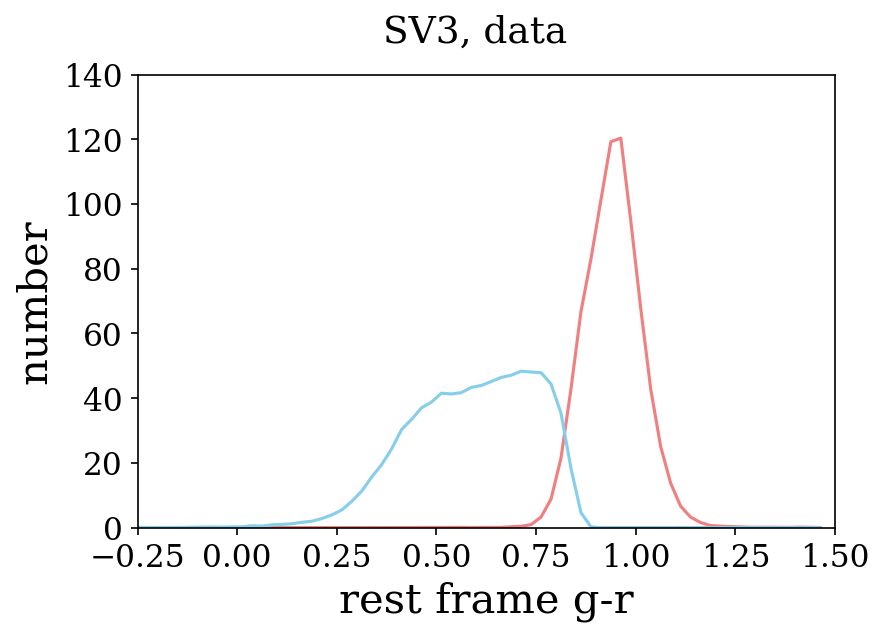

In [16]:
s=20
plt.figure(dpi=150)
plt.suptitle("SV3, data")
plotting.hist(red_data['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), weights=1/red_data['AREA'], color='lightcoral')
plotting.hist(blue_data['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), weights=1/blue_data['AREA'], color='skyblue')
plt.xlabel('rest frame g-r', size=s)
plt.ylabel('number', size=s)
plt.xlim(-0.25,1.5)
plt.ylim(0,140)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.show()